In [1]:
# Store the text collection data from file into an object

texts = [line.rstrip() for line in open('SMSSpamCollection')]

In [2]:
# Check length of data to confirm import

print(len(texts))

5574


In [3]:
# See how the data looks in the first 10 texts

for num,text in enumerate(texts[:10]):
    print(num,text)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
# ham(legitimate) or spam labels are already provided for each text

In [5]:
# Convert the tab separated values into a pandas dataframe

import pandas as pd

texts = pd.read_csv('SMSSpamCollection',sep='\t',names=['Labels','Texts'])

In [6]:
# Check the dataframe

texts.head()

,Labels,Texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# See some basic statistics

texts.describe()

,Labels,Texts
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Labels    5572 non-null object
Texts     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [9]:
# Categorize by Labels and see unique counts and most occuring counts

texts.groupby('Labels').describe()

Texts                                                               
       count unique                                                top freq
Labels                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [10]:
# Add a new column which has the length of that message

texts['Length'] = texts.Texts.apply(len)

In [11]:
# Check if column has been added correctly

texts.head()

,Labels,Texts,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# Data visualisation imports

import matplotlib.pyplot as plt
import seaborn as sns

# See visualisations in the iPython notebook
%matplotlib inline

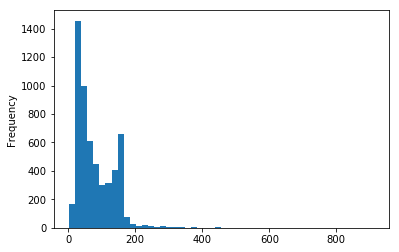

In [13]:
# Histogram based on length of texts

texts.Length.plot(bins=50,kind='hist')

In [14]:
# Description of the length column

texts['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
# We notice that the longest text is of 910 characters. Lets check it out

texts[texts['Length'] == 910]['Texts'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
# It looks like a guy is descibing what love is to him

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4349D9A20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A434D32160>], dtype=object)

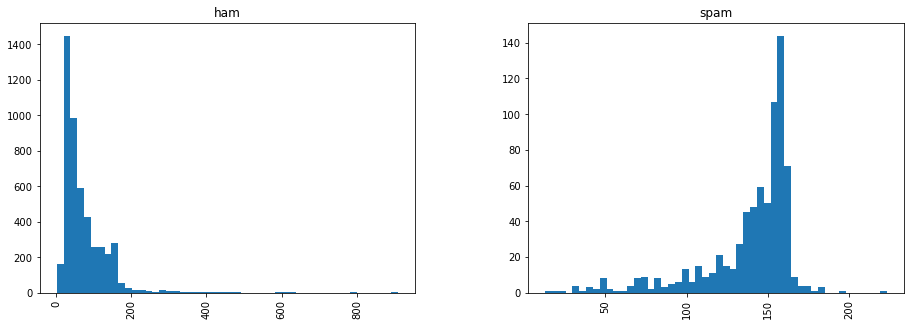

In [17]:
# Check if there is a connection between message length and whether it is ham or spam

texts.hist(column='Length',by='Labels',bins=50,figsize=(15,5))

In [18]:
# Ham texts histogram is skewed because of a few very long texts. However, spam texts are cutting off at a length of about 250 
# characters. Also, most of the ham texts are 0-150 characters long whereas most of the spam texts are anywhere between
# 150-175 characters long roughly

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A434F73588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A434FB2D68>], dtype=object)

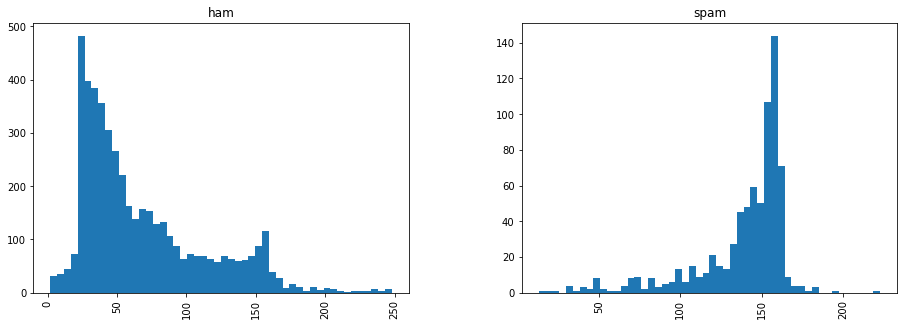

In [19]:
texts[texts['Length'] < 250].hist(column='Length',by='Labels',bins=50,figsize=(15,5))

In [20]:
# So we can see that the length of a text can be a good indicator of it being ham or spam

In [21]:
import string

In [22]:
# For the text data processing, we need to remove punctuation marks and stop words from them as they hamper the machine learning

sam_text = 'This is a sample text! Notice: It has many punctuation marks!'

In [23]:
# Remove the punctuation marks from sample text

nopunc = [char for char in sam_text if char not in string.punctuation]

nopunc

['T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 's',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'm',
 'a',
 'n',
 'y',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's']

In [24]:
# Merge the characters of the sample text

nopunc = ''.join(nopunc)
nopunc

'This is a sample text Notice It has many punctuation marks'

In [25]:
# From natural language toolkit, get list of stopwords

from nltk.corpus import stopwords

In [26]:
# Remove stopwords from the sample text

clean_text = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [27]:
clean_text

['This', 'sample', 'text', 'Notice', 'It', 'many', 'punctuation', 'marks']

In [28]:
# Uppercase stopwords are not removed. Convert everything to lowercase while removing stopwords

clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
clean_text

['sample', 'text', 'Notice', 'many', 'punctuation', 'marks']

In [30]:
# Create function for the steps of processing for the entire dataset

def remove_punc_stopwords(text):
    
    # Remove punctuations and merge it 
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove stopwords and return list of words
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
# For conversion to vectors, get CountVectorizer from sklearn

from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# Create CountVectorizer object with the analyzer function as the preprocessing function created earlier

bow_transformer = CountVectorizer(analyzer=remove_punc_stopwords)

In [33]:
# Pass dataset through CountVectorizer

bow_transformer.fit(texts['Texts'])

CountVectorizer(analyzer=<function remove_punc_stopwords at 0x000002A43784A488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [34]:
# Try out a sample to see its vector values given to words

text4 = texts['Texts'][3]
print(text4)

U dun say so early hor... U c already then say...


In [35]:
# Make an object for the sample

bow4 = bow_transformer.transform([text4])

In [36]:
# Check values

print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [37]:
# Check out a particular value to see its corresponsing word and count

print(bow_transformer.get_feature_names()[9554])

say


In [38]:
# Pass entire dataset into word to vector transformer object

texts_bow = bow_transformer.transform(texts['Texts'])

In [39]:
# Print the shape of the sparse matrix, number of non-zero occurences and sparsity of the data

print('Shape of the Sparse Matrix: ',texts_bow.shape)
print('Amount of non-zero occurences: ', texts_bow.nnz)
print('Sparsity: %.2f%%' %(100.0*texts_bow.nnz/(texts_bow.shape[0]*texts_bow.shape[1])))

Shape of the Sparse Matrix:  (5572, 11425)
Amount of non-zero occurences:  50548
Sparsity: 0.08%


In [40]:
# To perform tf-idf (term frequency - inverse document frequency on data, get TfidfTransformer from sklearn
# Fit the entire data into tfidftransformer to calculate the weights of all words

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(texts_bow)

In [41]:
# Transform the sample

tfidf4 = tfidf_transformer.transform(bow4)

In [42]:
# Check weight values of the sample

print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [43]:
# Transform the entire dataset to give weights to all words

texts_tfidf = tfidf_transformer.transform(texts_bow)

In [44]:
texts_tfidf.shape

(5572, 11425)

In [45]:
# NaiveBayes works very well with text data so get MultinomialNB from sklearn

from sklearn.naive_bayes import MultinomialNB

In [46]:
# Fit the weighted vectors of words and the labels into the model

spam_detect_model = MultinomialNB().fit(texts_tfidf,texts['Labels'])

In [47]:
# Check the sample for its prediction against actual

print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Actual: ', texts['Labels'][3] )

Predicted:  ham
Actual:  ham


In [48]:
# Store all predictions of the dataset

all_predictions = spam_detect_model.predict(texts_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [49]:
# Get classification report from sklearn to evaluate model

from sklearn.metrics import classification_report
print(classification_report(texts['Labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [50]:
# Get train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [51]:
# Split data with 80% training and 20% test data

txt_train,txt_test,label_train,label_test = train_test_split(texts['Texts'],texts['Labels'],test_size=0.2)

In [52]:
# Get pipeline from sklearn

from sklearn.pipeline import Pipeline

In [53]:
# Prepare pipeline for preprocessing, vectorization, tf-idf and classifier

pipeline = Pipeline([('bag_of_words',CountVectorizer(analyzer=remove_punc_stopwords)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
                    ])

In [54]:
# Fit the pipeline with training data

pipeline.fit(txt_train,label_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function remove_punc_stopwords at 0x000002A43784A488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [55]:
# Load predictions for test data into an object

predictions = pipeline.predict(txt_test)

In [56]:
# Generate classification report

print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98      1017
       spam       0.68      1.00      0.81        98

avg / total       0.97      0.96      0.96      1115

